In [1]:
# This code is used to overlap circle light curve on 
# KIC 9166862 AND other good light curves

In [2]:
a = 10
a

10

In [3]:
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 400
import numpy as np

In [4]:
kepid_array = np.load("../data/tfr_shallue/npy_shallue/kepid.npy")
print('kepid_load = ',kepid_array[0])

av_training_set_array = np.load("../data/tfr_shallue/npy_shallue/av_training_set.npy")
print('av_training_set_array = ',av_training_set_array[0])

local_view_array = np.load("../data/tfr_shallue/npy_shallue/local_view.npy")
local_view_array = local_view_array + 1
print('local_view_array = ',local_view_array[0])

kepid_load =  11709124.0
av_training_set_array =  b'P'
local_view_array =  [0.93076026 0.97436073 0.95249195 0.93658737 0.97134435 0.92774388
 0.92774388 1.01563036 1.03605951 1.05991636 1.05511757 0.95612532
 1.00616988 1.04483444 1.02111469 1.01933228 1.00041133 0.95461712
 0.94892713 0.94974978 0.96421471 0.99081374 1.03290601 1.05470625
 0.99245904 1.00013711 1.02262288 1.02577638 1.11297731 1.09858093
 1.07417563 1.03290601 0.92123123 1.02426818 1.01535614 1.00808939
 0.98299856 0.91197642 0.92582437 0.92020292 0.94186604 0.97353808
 0.96915061 1.02330843 0.96462604 0.96462604 1.00137108 1.01096867
 0.98313567 1.01727566 1.01878385 1.01878385 1.00260506 1.06951395
 0.95461712 0.93350244 1.00671831 0.95338315 0.97120724 0.94460821
 0.94419689 0.9688764  0.98642627 0.97847398 0.98313567 1.06773154
 0.97724001 0.98450675 0.96832796 0.92884075 0.98423254 0.96229519
 1.01535614 1.078426   1.08020841 1.08212792 1.08322479 1.0098718
 1.06156166 1.06348118 1.0818537  1.09227394 1.06649756

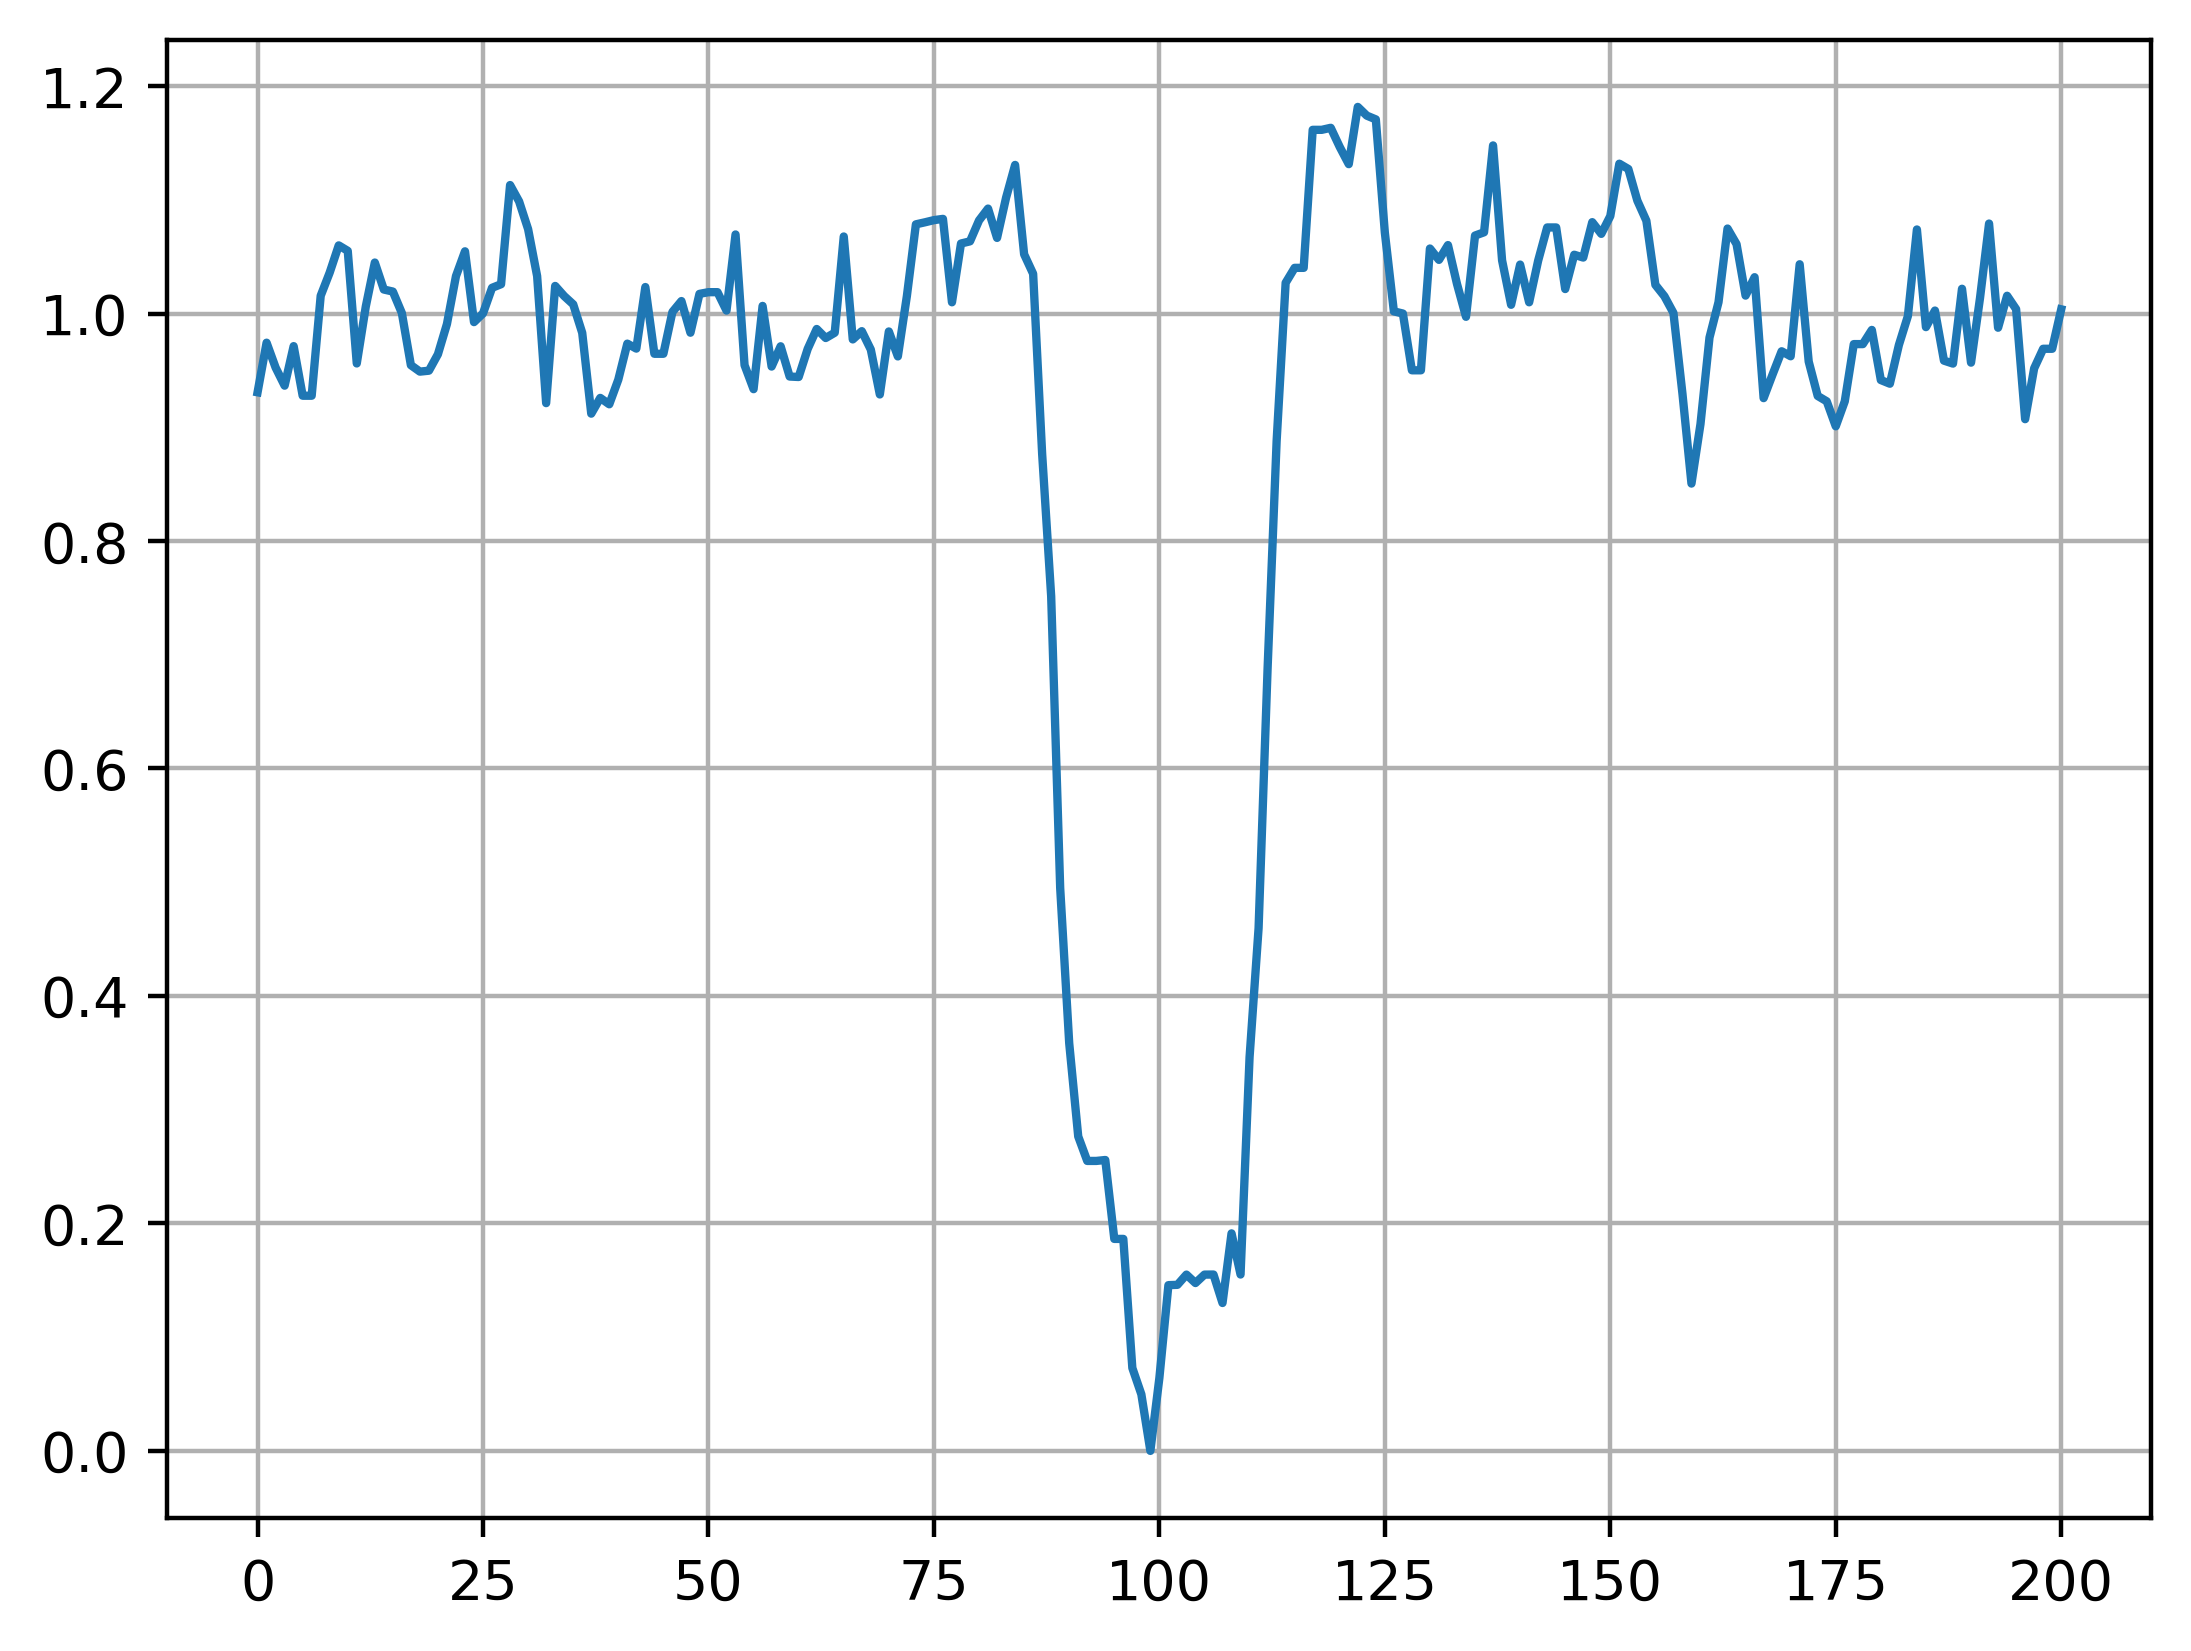

In [5]:
# Plot one light curve (local)
plt.grid('on')
plt.plot(np.arange(len(local_view_array[0])),local_view_array[0])
plt.show()

In [6]:
# Calculate SNR for each Local view lc and save them in an array
noise_array = np.zeros((len(local_view_array),120))
for i in np.arange(len(local_view_array)):
    noise_array[i][0:60] = local_view_array[i,0:60]
    noise_array[i][60:120] = local_view_array[i,141:202]
std_devs_Kepler = np.array([np.std(arr) for arr in noise_array])
SNR_Kepler = 1/std_devs_Kepler

No. of light curves with SNR > 500 =  41
Total no. of light curves =  15737


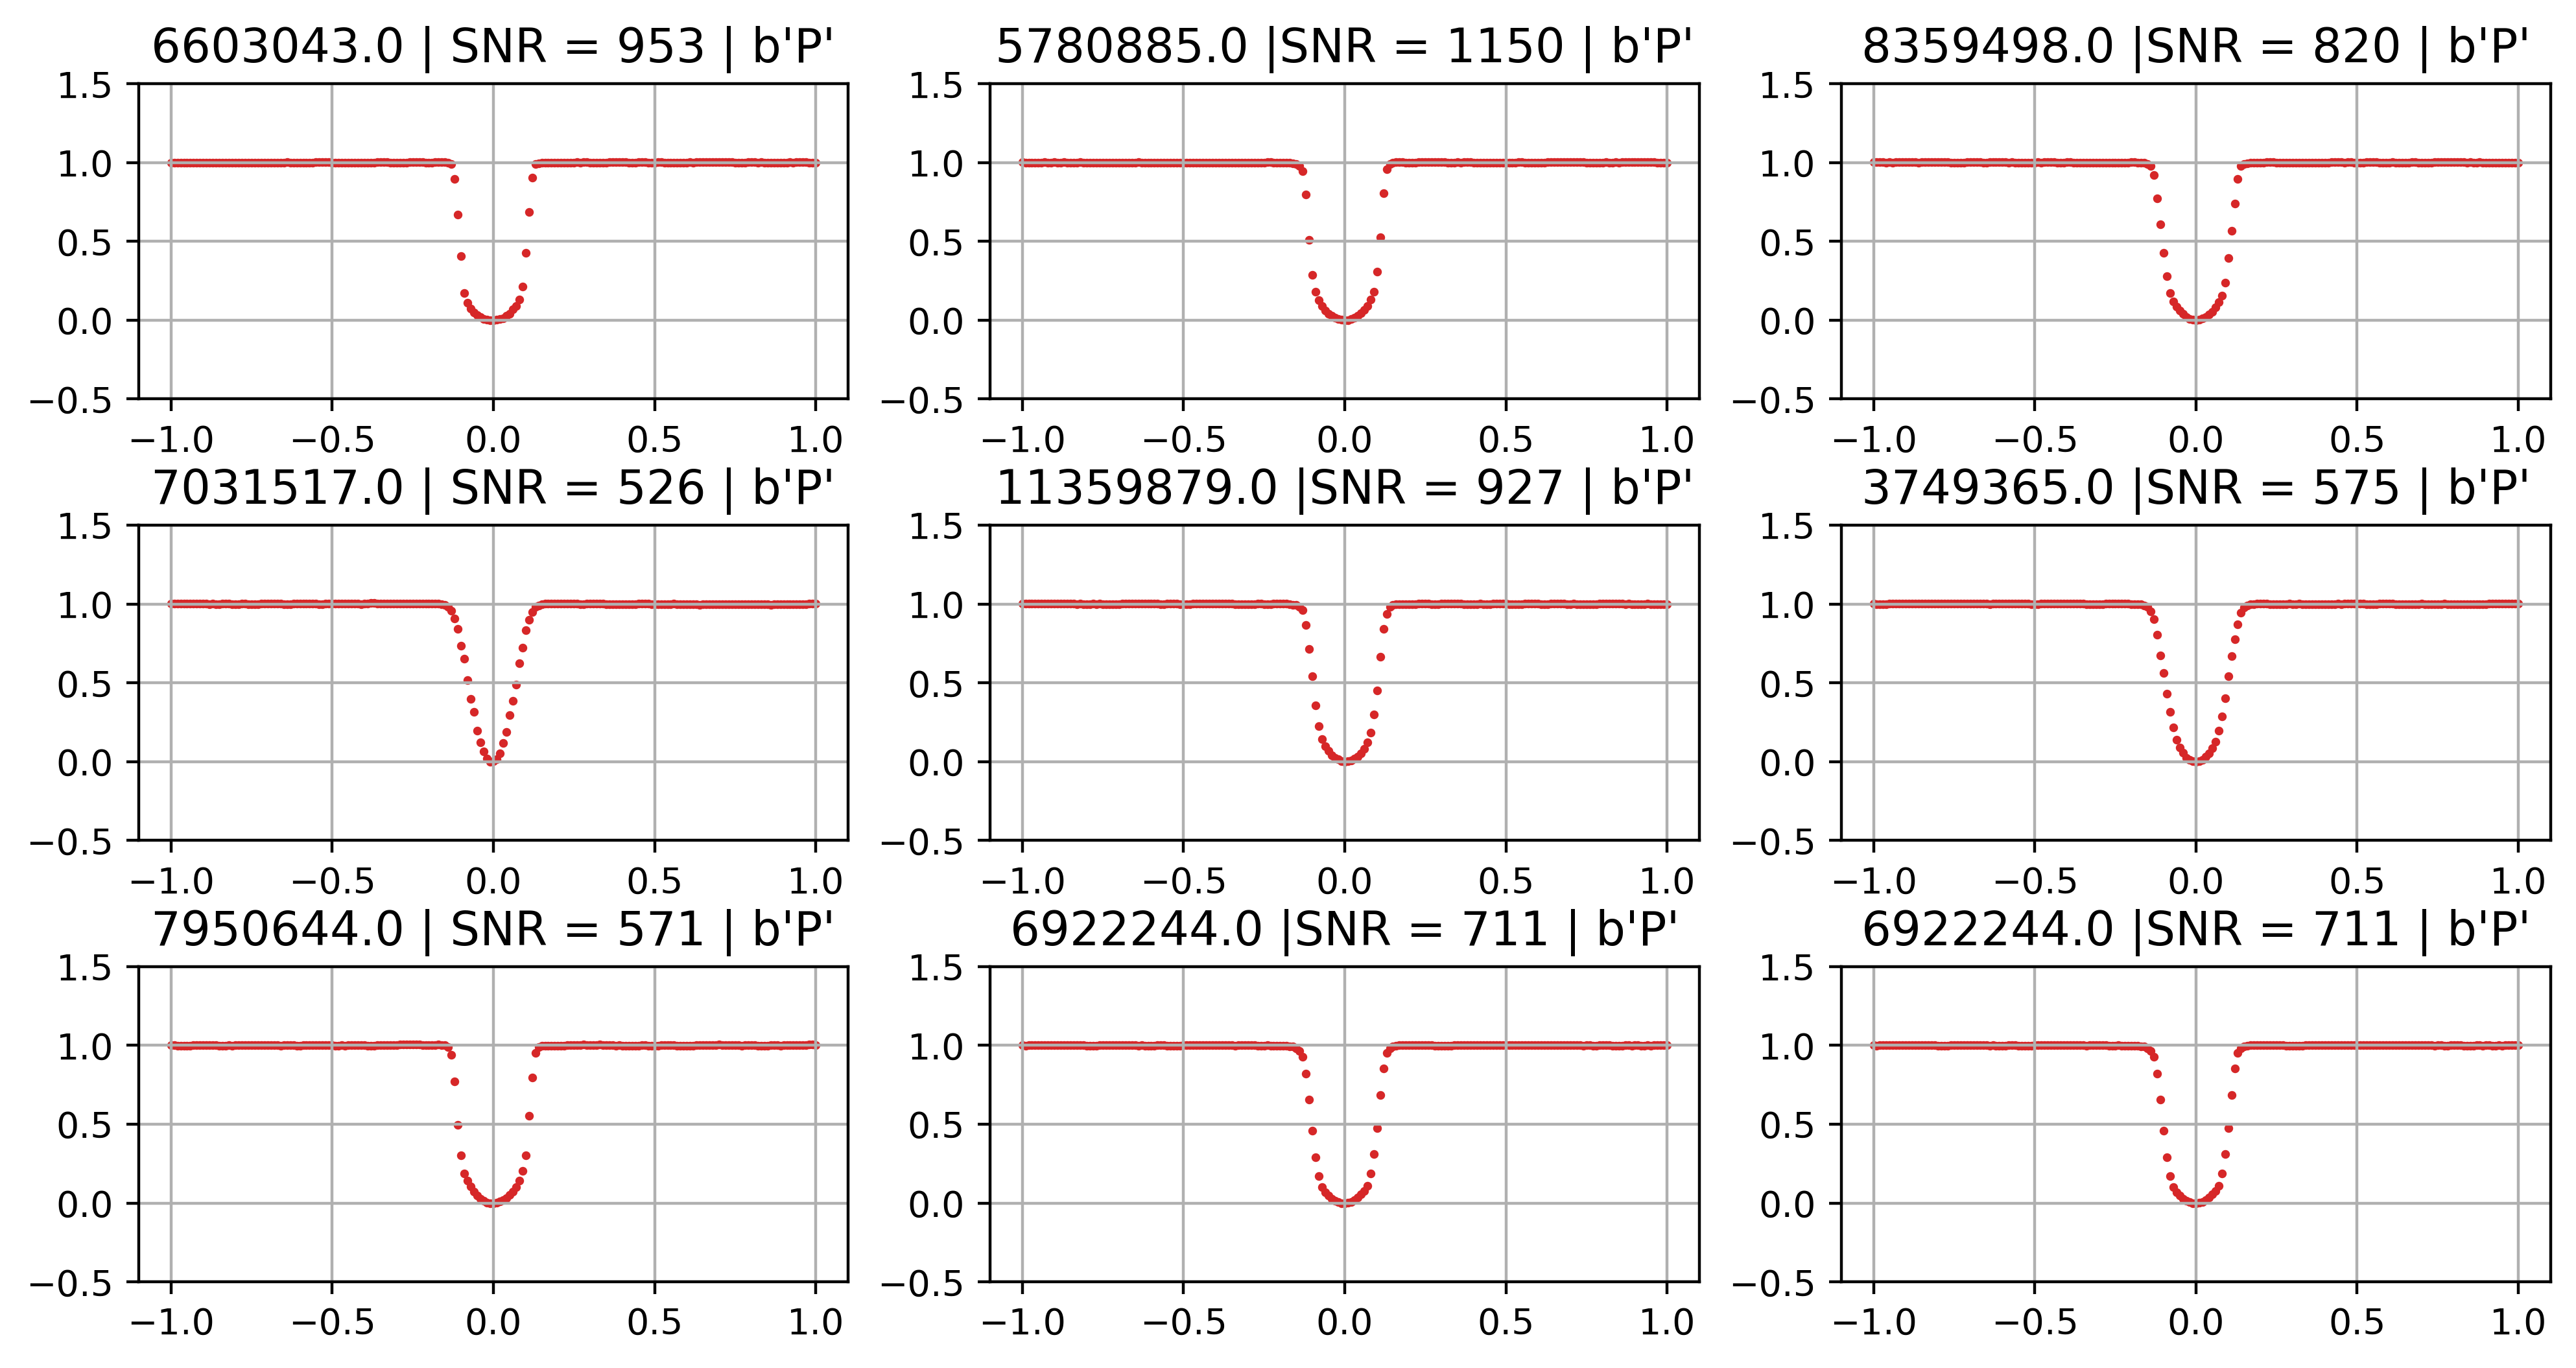

In [7]:
# Save the index of the light curve with SNR > 500
# and plot them
# select_kepler_lc = lc_np_array[SNR_Kepler>75]
# select_kepler_lc = select_kepler_lc + 1

SNR_Threshold = 500
selected_kepler_index_mask = ((SNR_Kepler > SNR_Threshold) & (av_training_set_array==b'P')) 
selected_kepler_index = np.where(selected_kepler_index_mask)[0]
print(f"No. of light curves with SNR > {SNR_Threshold} = ",len(selected_kepler_index))
print(f"Total no. of light curves = ",len(SNR_Kepler))
# Plot the selected light curves 3 x 3
num = 3
fig,ax=plt.subplots(num,3, figsize=(12,6), gridspec_kw={ 'width_ratios': [1,1,1],
        'wspace': 0.2,'hspace': 0.4})

# ax[0][1].set_title('Shape',size=15)
# ax[0][0].set_title('Light Curve (Train Dataset)',size=15)
# ax[num-1][0].set_xlabel('Phase',size=13)
ph_kepler = np.linspace(-1,1,len(local_view_array[0]))


i = 0
for i in np.arange(0,num):
    # k = np.random.randint(0, len(select_kepler_lc)-50)
    k = int(np.random.choice(selected_kepler_index))
    ax[i][0].set_title(f'{np.round(kepid_array[k],0)} | SNR = {int(np.round(SNR_Kepler[k],0))} | {av_training_set_array[k]}',size=13)
    ax[i][0].set_ylim(-0.5,1.5)
    ax[i][0].scatter(ph_kepler, local_view_array[k],color = 'tab:red',s=2)
    ax[i][0].grid('on')

    k = int(np.random.choice(selected_kepler_index))
    ax[i][1].set_title(f'{np.round(kepid_array[k],0)} |SNR = {int(np.round(SNR_Kepler[k],0))} | {av_training_set_array[k]}',size=13)
    ax[i][1].set_ylim(-0.5,1.5)
    ax[i][1].scatter(ph_kepler, local_view_array[k],color = 'tab:red',s=2)
    ax[i][1].grid('on')

    k = int(np.random.choice(selected_kepler_index))
    ax[i][2].set_title(f'{np.round(kepid_array[k],0)} |SNR = {int(np.round(SNR_Kepler[k],0))} | {av_training_set_array[k]}',size=13)
    ax[i][2].set_ylim(-0.5,1.5)
    ax[i][2].scatter(ph_kepler, local_view_array[k],color = 'tab:red',s=2)
    ax[i][2].grid('on')
    i = i + 1

In [8]:
# selecting left and right side by certain percentage
# (A) Kepler LC
# lc_np_array_offset_mask used to select the flat part by certain percentage
local_view_array_mask = np.copy(local_view_array)

for iter in np.arange(len(local_view_array_mask)):
    # 0.988 is working good | lower it and see changes # 0.96 - 0.97 -better # 0.95 -worse
    local_view_array_mask[iter][(local_view_array_mask[iter]>=0.98)] = 1.0
    local_view_array_mask[iter][(local_view_array_mask[iter]<0.98)] = 0.0

print("Length of one Kepler LC = ",len(local_view_array_mask[0]))



count_zeros_array_kepler = np.zeros((len(local_view_array),))
for iteration in np.arange(len(local_view_array)):
    # Calculate the number of occurrences of '0'
    count_zeros = np.count_nonzero(local_view_array_mask[iteration] == 0)  
    count_zeros_array_kepler[iteration] = count_zeros




Length of one Kepler LC =  201


center_index_kepler =  100
selected_kepler_index_elem =  2875


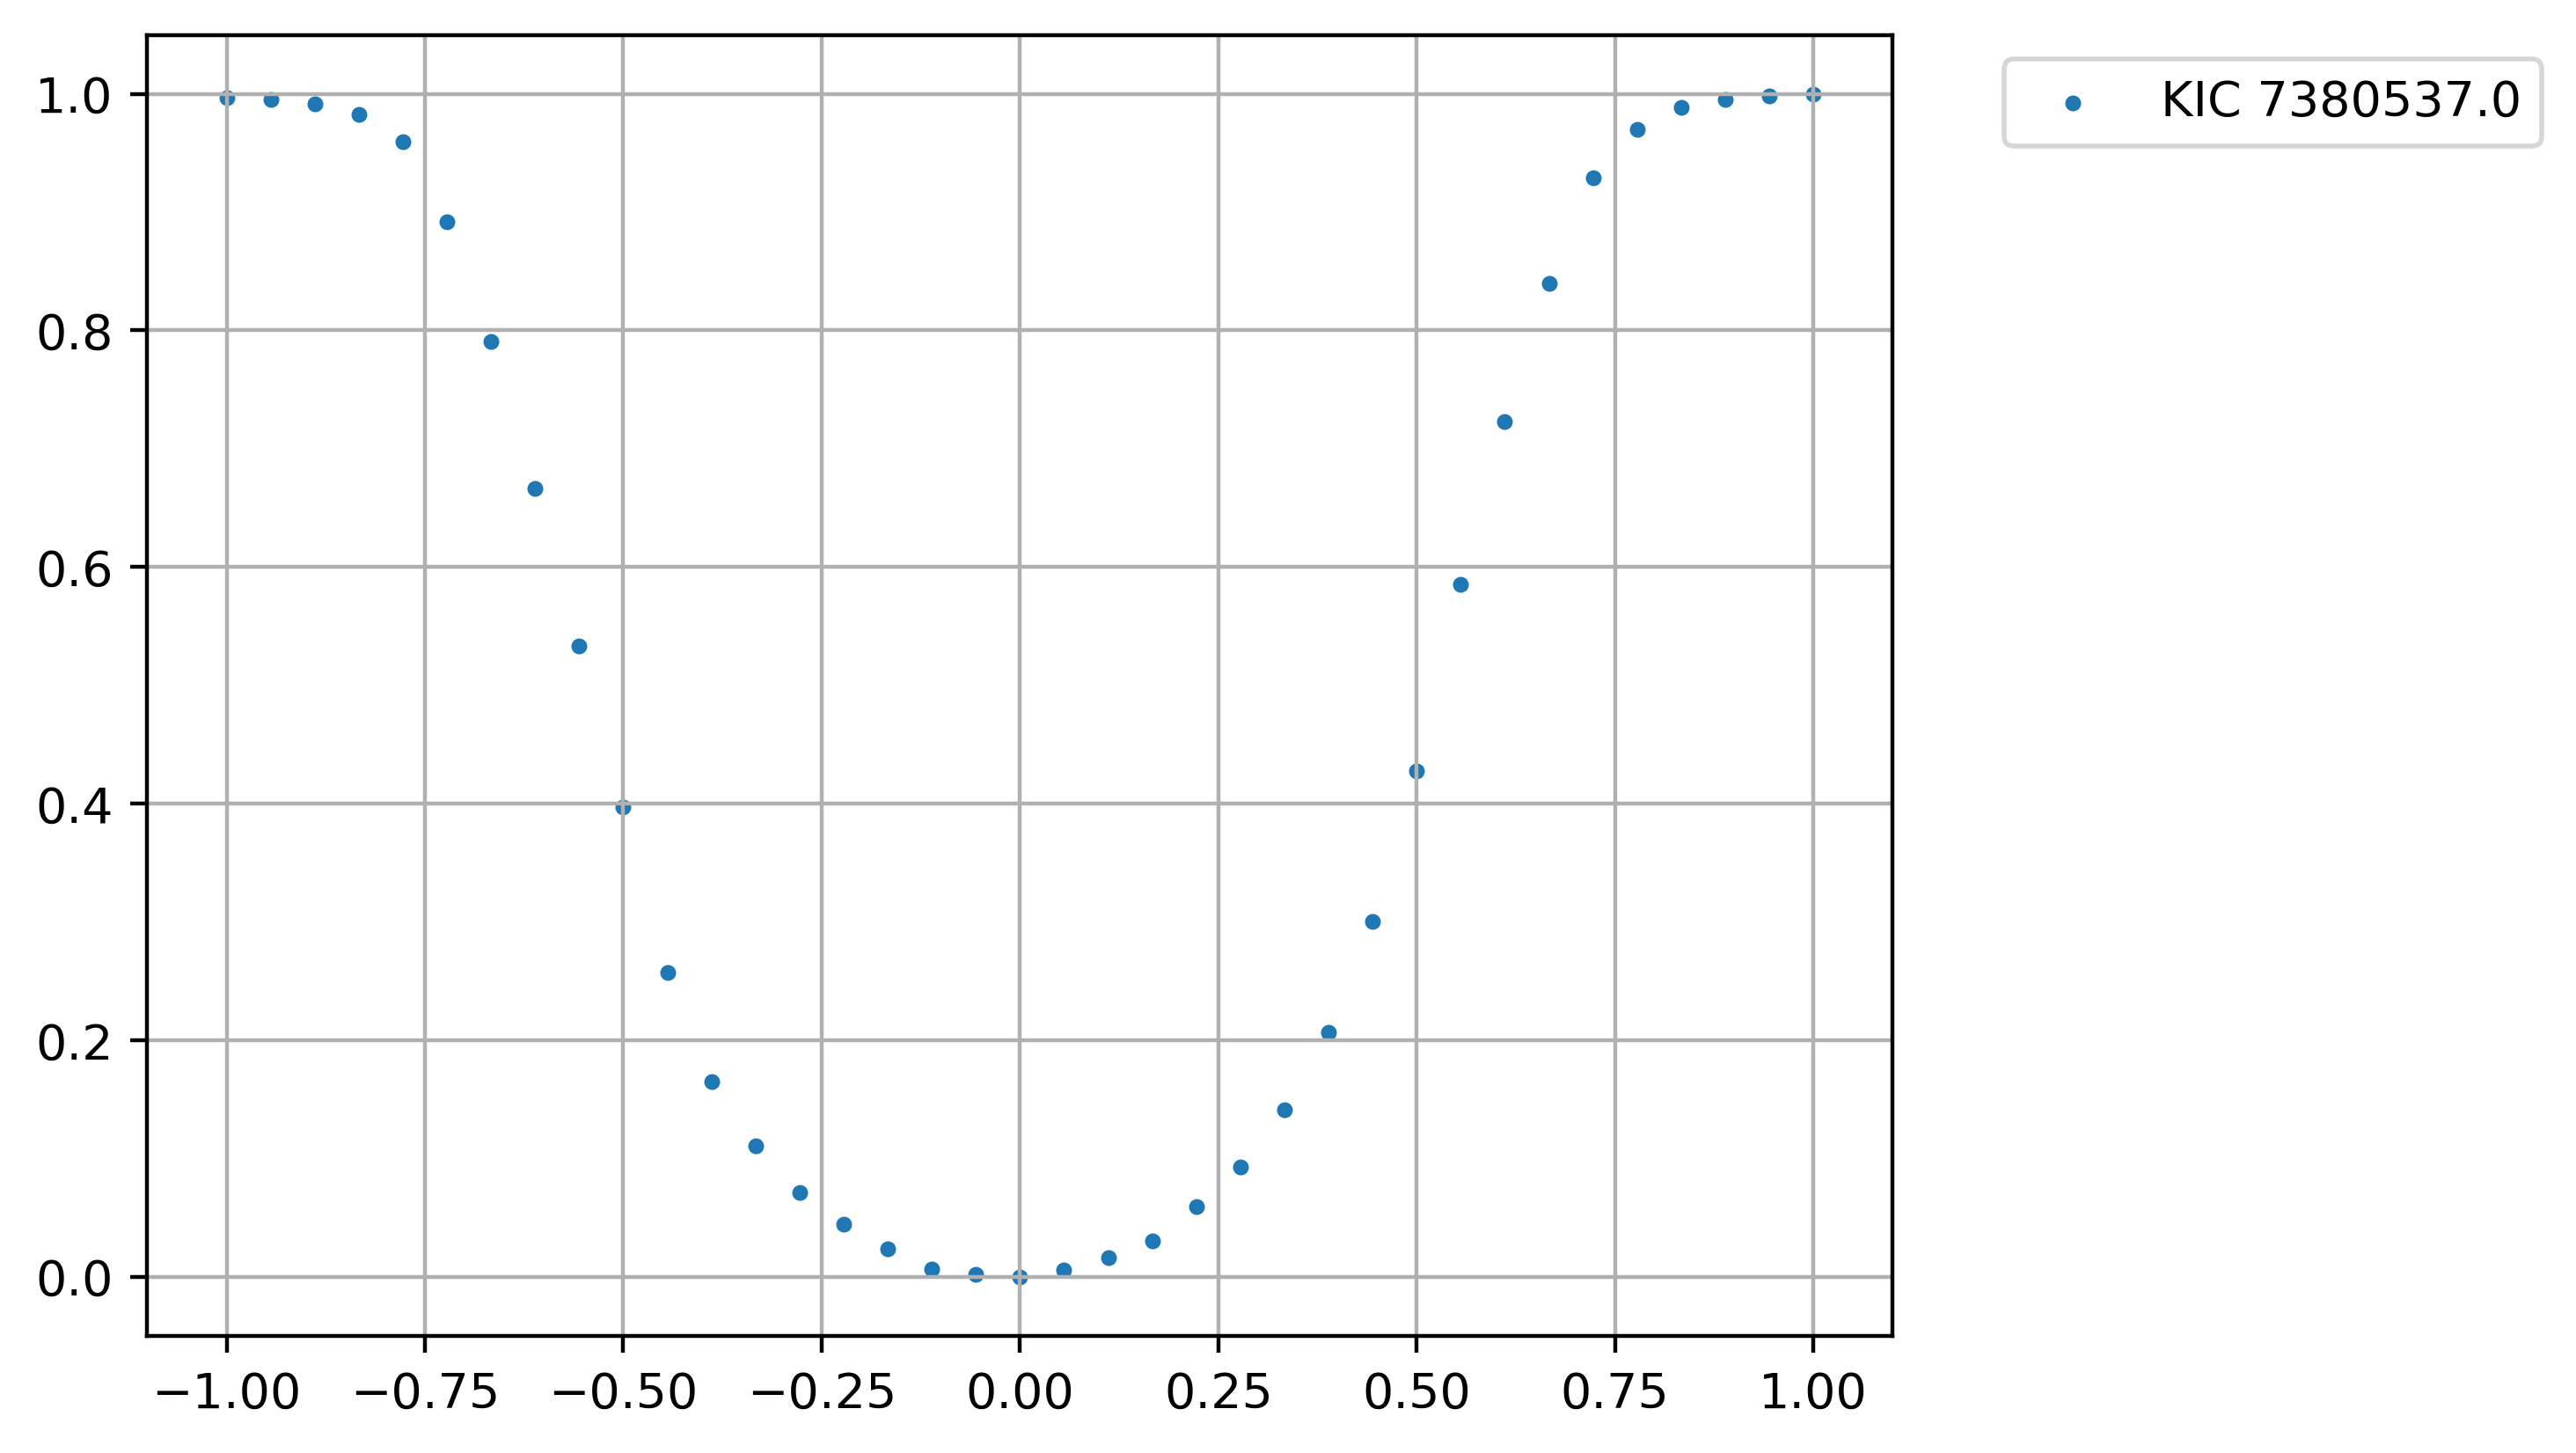

In [9]:
center_index_kepler = int(len(local_view_array[0])/2)
print("center_index_kepler = ",center_index_kepler)

# Create a figure and axis
fig, ax = plt.subplots()

for iteration in np.arange(1):
    # selected_kepler_index_elem = selected_kepler_index[iteration]
    selected_kepler_index_elem = np.random.choice(selected_kepler_index)
    print('selected_kepler_index_elem = ',selected_kepler_index_elem)
    left_index_kepler = int(center_index_kepler - int(count_zeros_array_kepler[selected_kepler_index_elem]/2)-int(count_zeros_array_kepler[selected_kepler_index_elem]/6)) 
    right_index_kepler = int(center_index_kepler + int(count_zeros_array_kepler[selected_kepler_index_elem]/2)+int(count_zeros_array_kepler[selected_kepler_index_elem]/6))
    # print("left_index = ",left_index)
    # print("right_index = ",right_index)
    lc_test_kepler=local_view_array[selected_kepler_index_elem][left_index_kepler:right_index_kepler+1]
    ax.scatter(np.linspace(-1,1,len(lc_test_kepler)),lc_test_kepler,s=5,label=f"KIC {kepid_array[selected_kepler_index_elem]}")
    # ax.plot(np.linspace(-1,1,len(lc_test)),lc_test)

plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.grid('on')
plt.show()


In [10]:
train_lc_dir =  '/scratch/abraham/Documents/mega_git/mega/data/train/npy/lc/lc_planet_oblate/lc_1_planet_oblate_circle.npy'
train_lc = np.load(train_lc_dir)


In [11]:
# 2. Normalize the lightcurves
## - Train Set
train_lc_scaled = np.zeros(train_lc.shape)
for i in np.arange(len(train_lc_scaled)):
    train_lc_scaled[i] = (train_lc[i] - np.amin(train_lc[i]))/(np.amax(train_lc[i]) - np.amin(train_lc[i]))


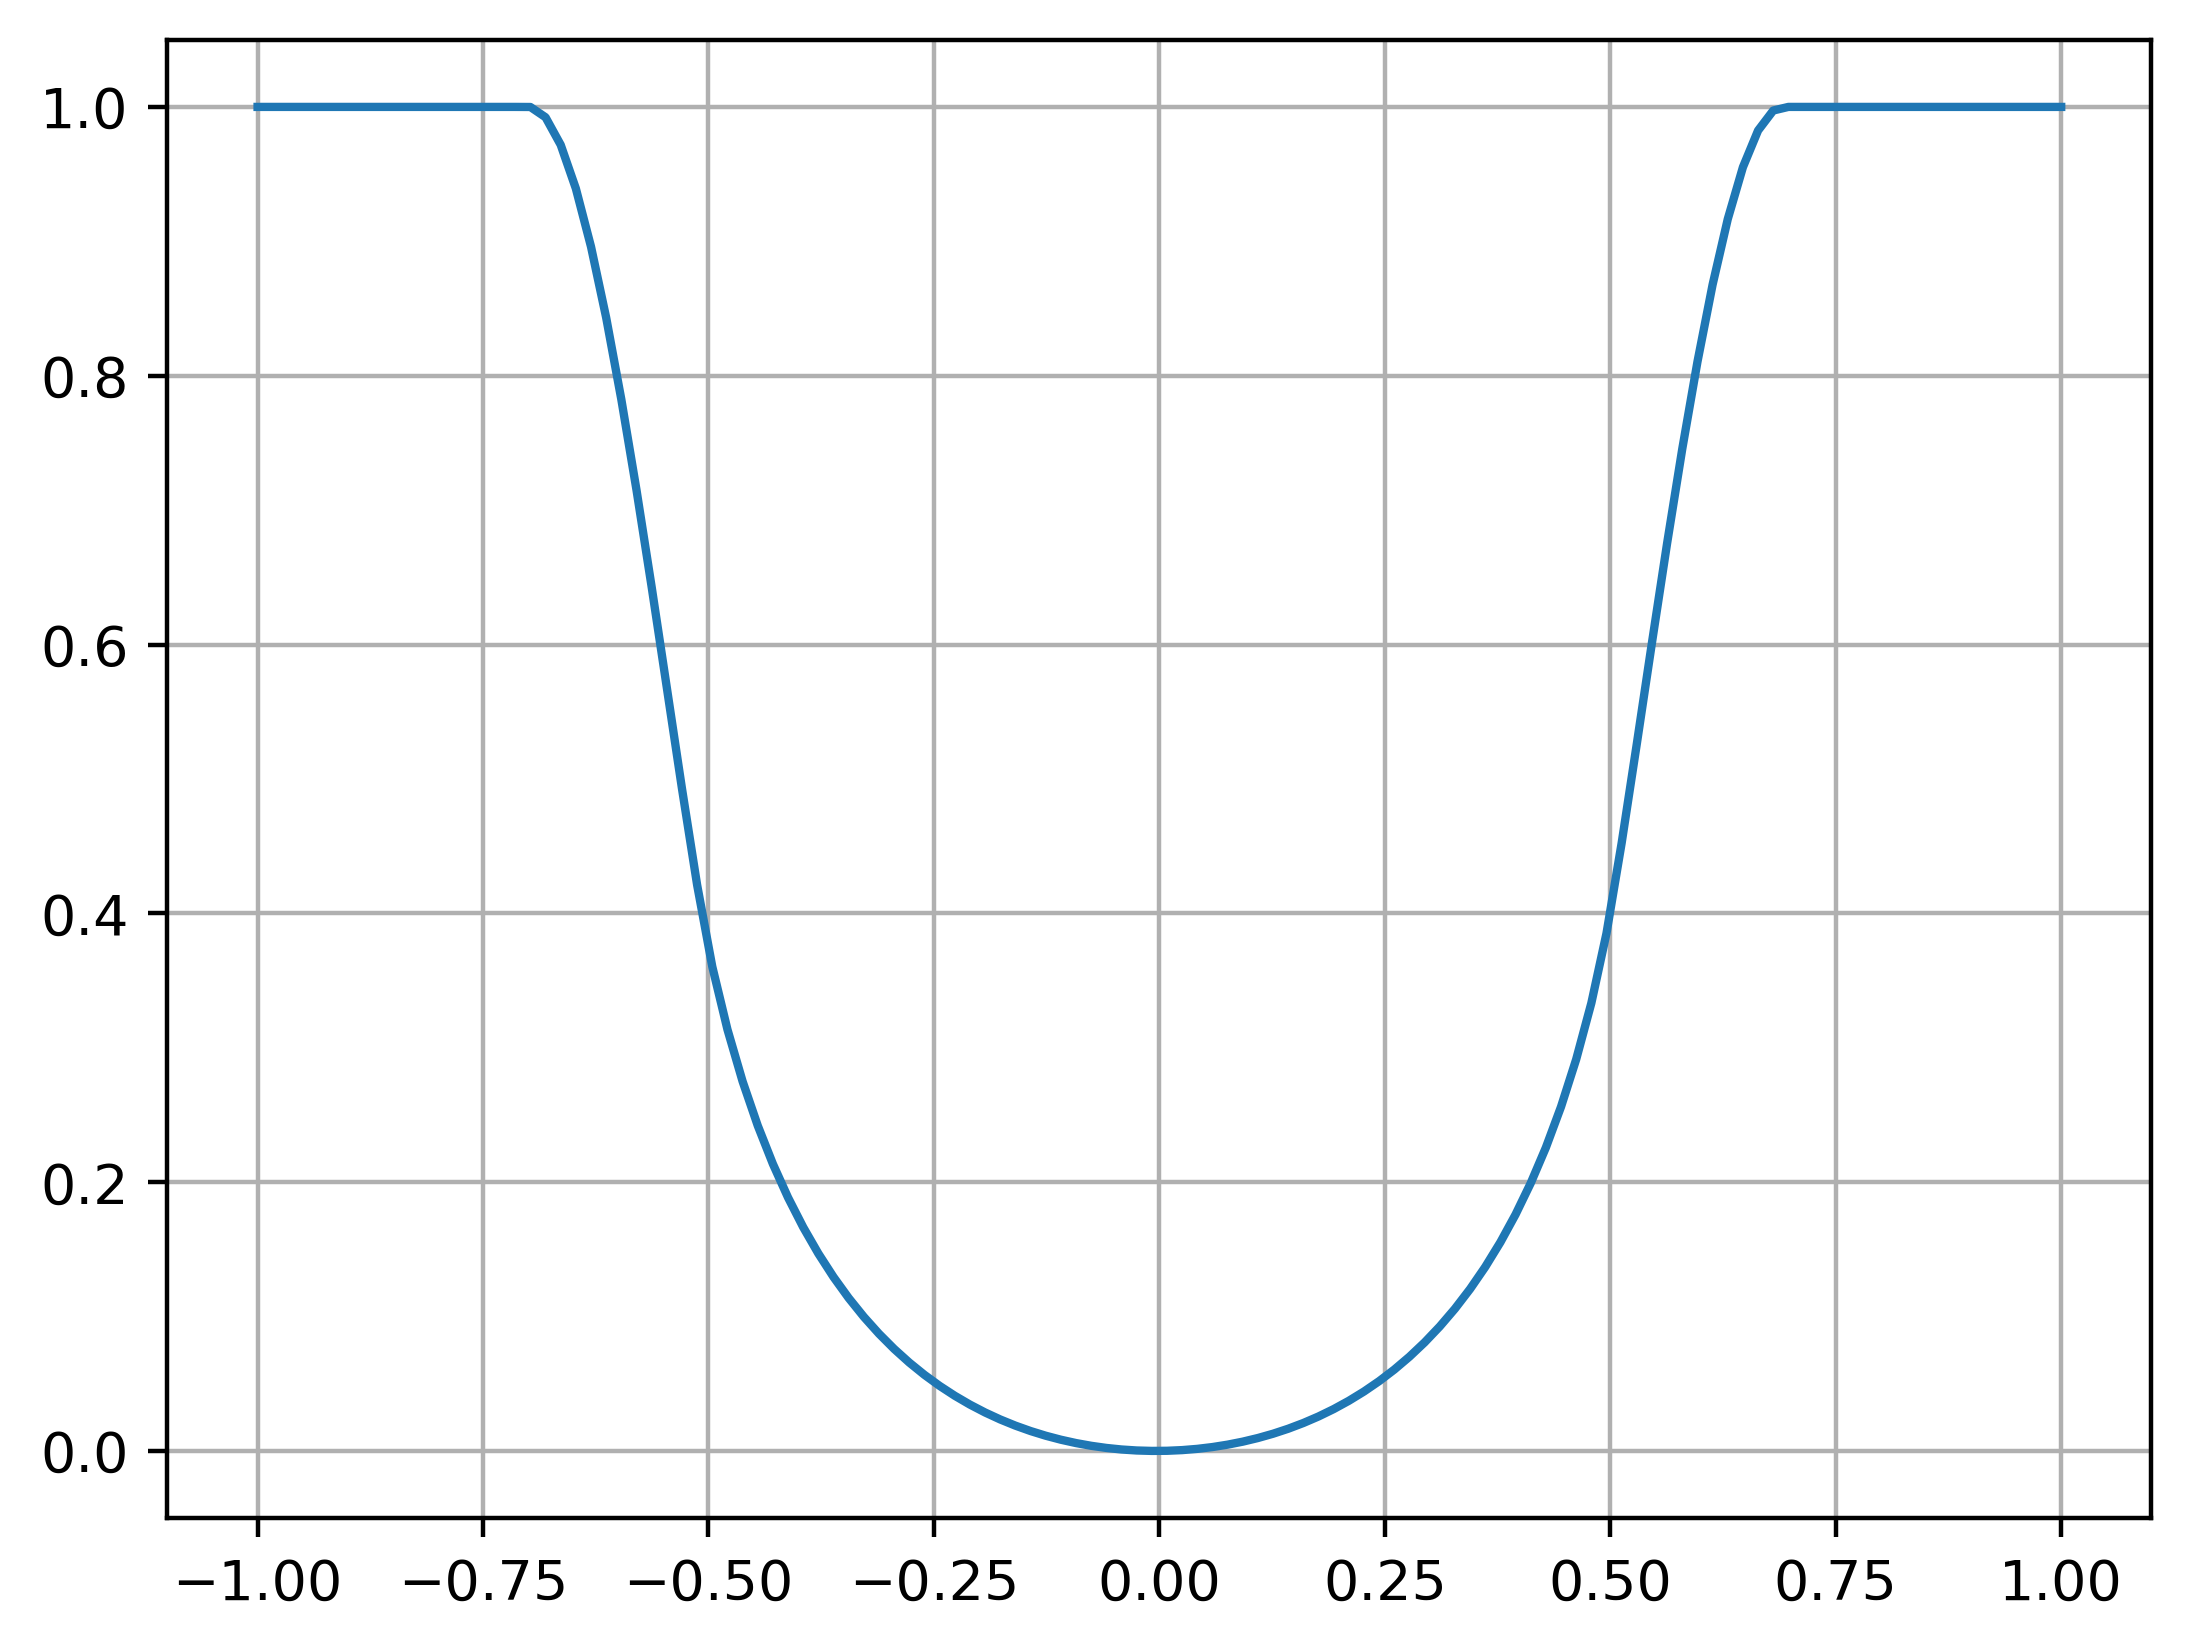

In [12]:
ph = np.linspace(-1,1,len(train_lc_scaled[2]))
plt.plot(ph,train_lc_scaled[2])
plt.grid('on')
plt.show()

In [13]:
# (B) Simulated LC
# lc_np_array_offset_mask used to select the flat part by certain percentage
simul_lc_array_mask = np.copy(train_lc_scaled)

for iter in np.arange(len(simul_lc_array_mask)):
    # 0.988 is working good | lower it and see changes # 0.96 - 0.97 -better # 0.95 -worse
    simul_lc_array_mask[iter][(train_lc_scaled[iter]>=0.98)] = 1.0
    simul_lc_array_mask[iter][(train_lc_scaled[iter]<0.98)] = 0.0

print("Length of one simulated LC = ",len(simul_lc_array_mask[0]))

count_zeros_array_simul_LC = np.zeros((len(train_lc_scaled),))
for iteration in np.arange(len(train_lc_scaled)):
    # Calculate the number of occurrences of '0'
    count_zeros = np.count_nonzero(simul_lc_array_mask[iteration] == 0)  
    count_zeros_array_simul_LC[iteration] = count_zeros

Length of one simulated LC =  120


center_index =  60
selected_simulated_index =  0
left_index_simul =  7
right_index_simul =  113
selected_kepler_index_elem =  2875


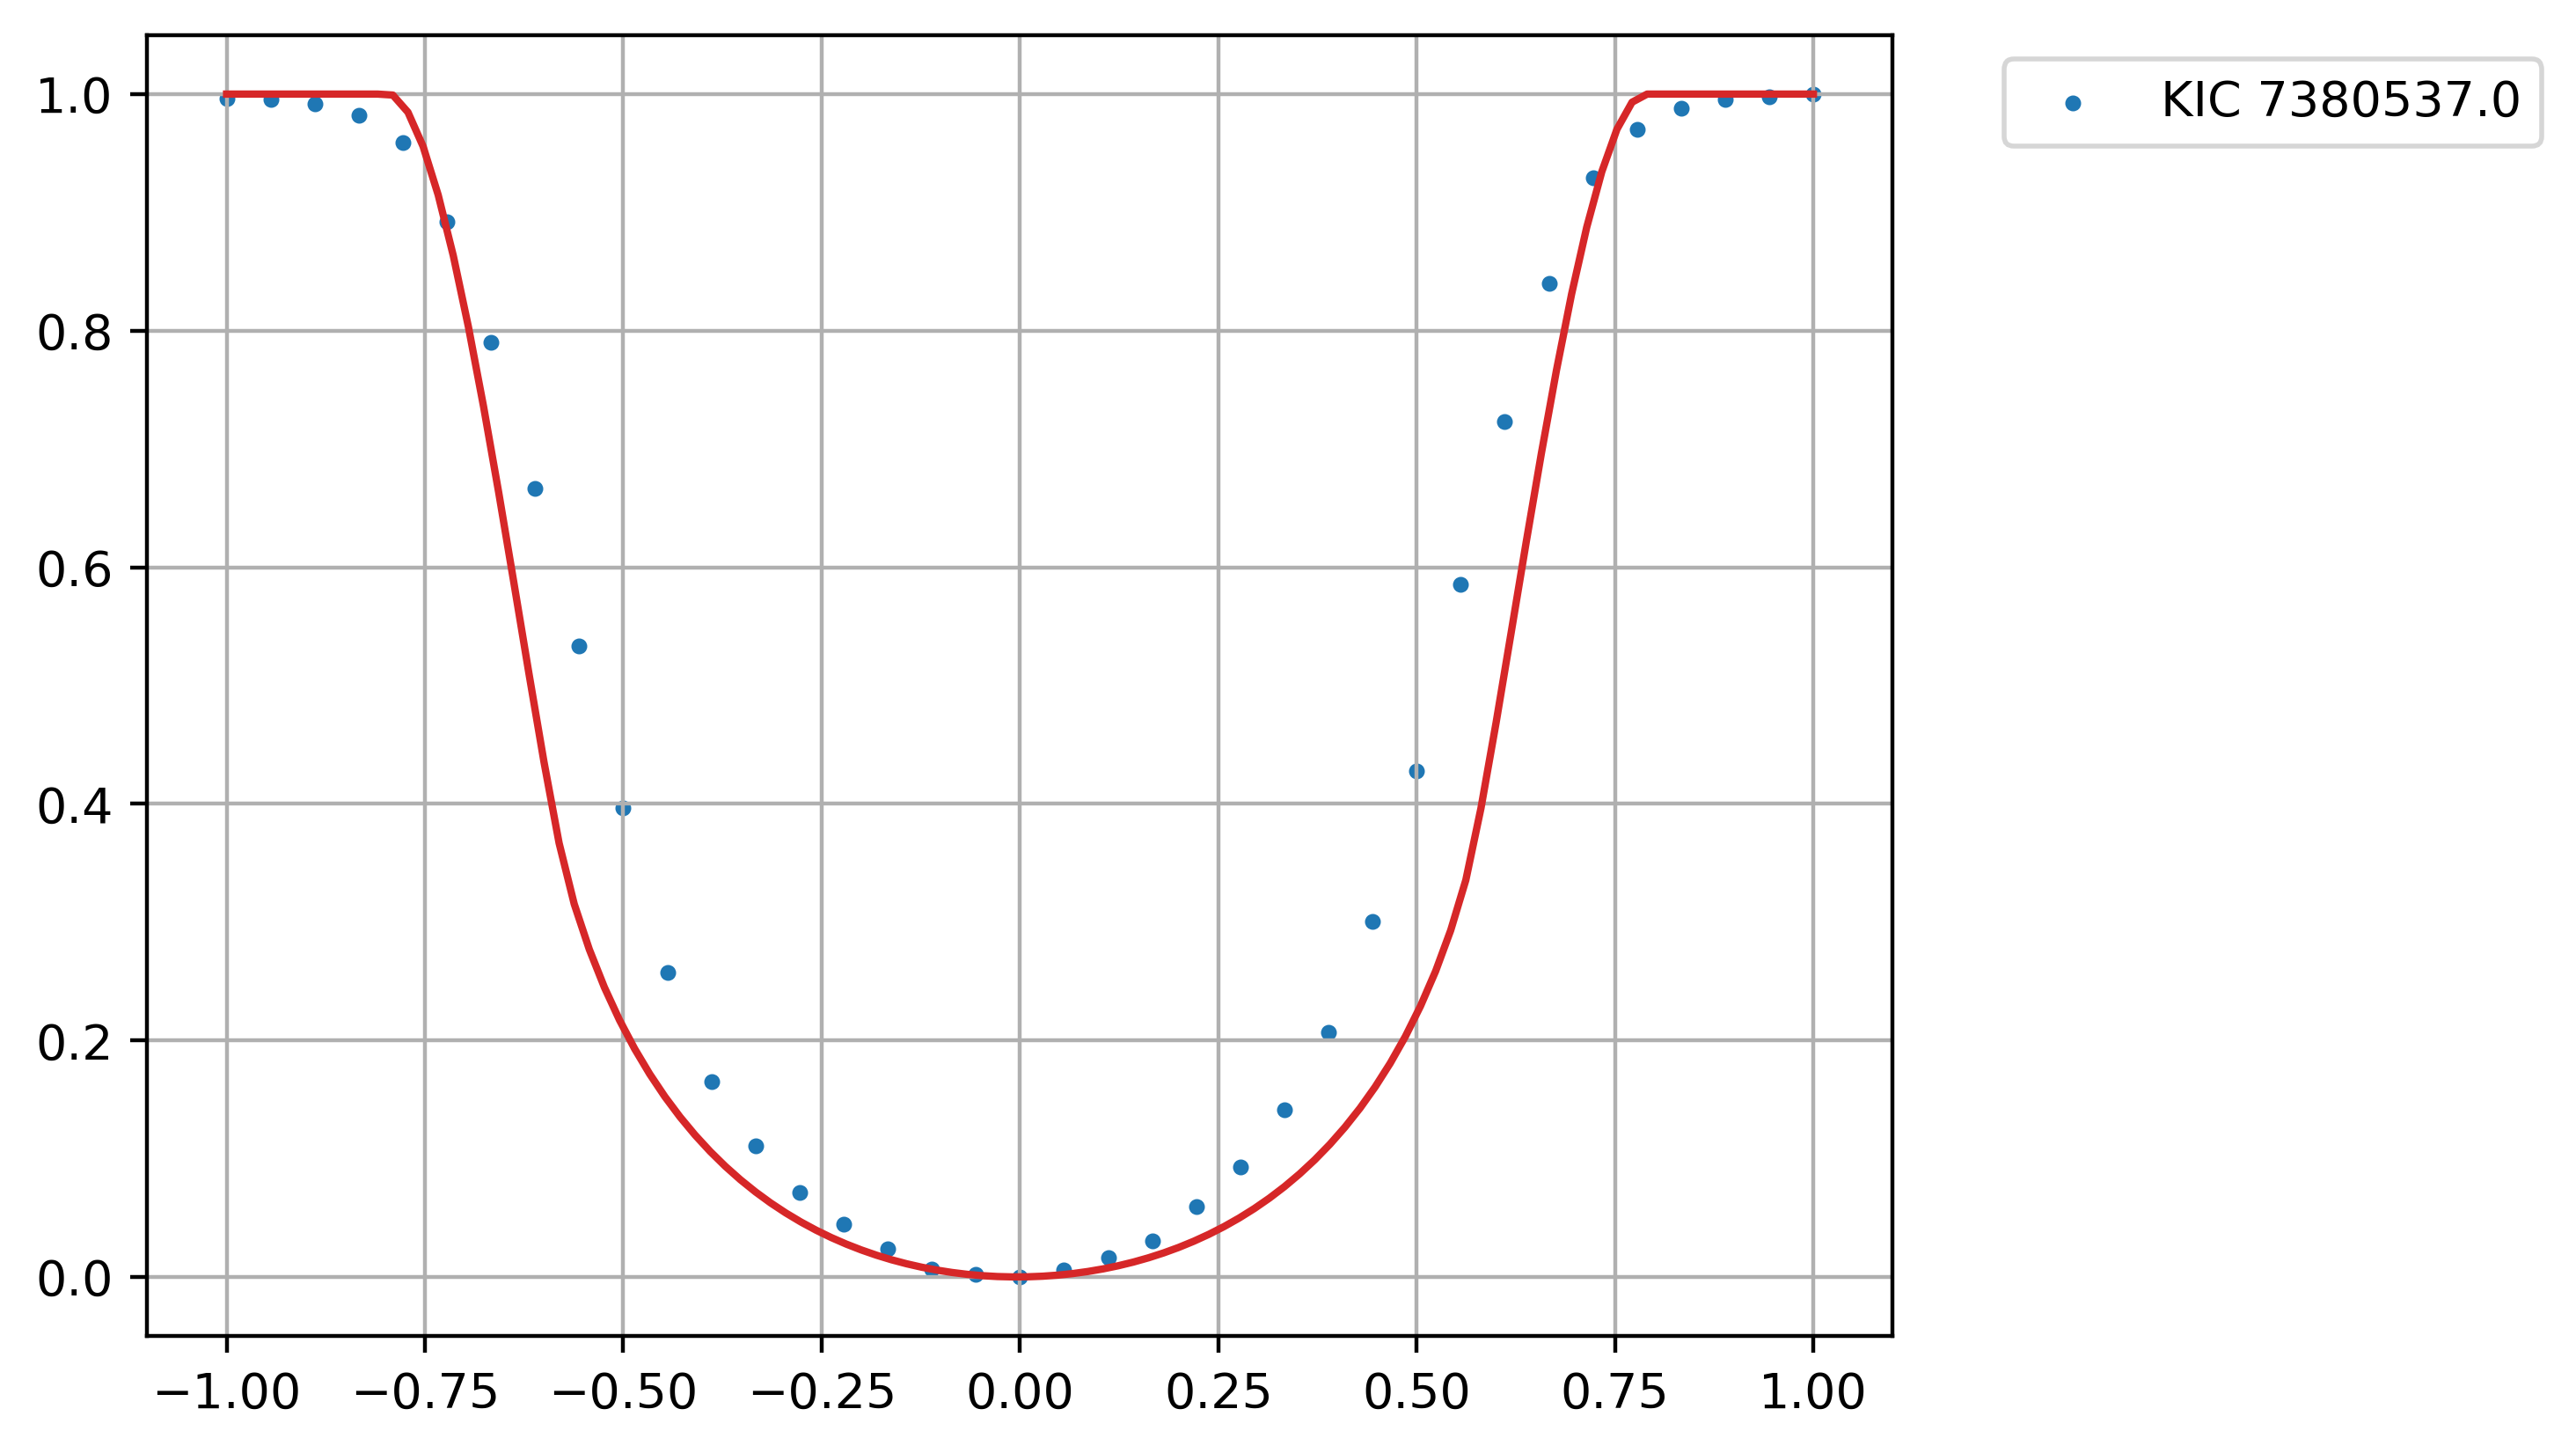

In [19]:
center_index_simulate = int(len(train_lc_scaled[0])/2)
print("center_index = ",center_index_simulate)

# Create a figure and axis
fig, ax = plt.subplots()

for iteration in np.arange(1):
    # Simulated LC
    selected_simulated_index = np.random.randint(0,len(train_lc_scaled))
    print('selected_simulated_index = ',selected_simulated_index)
    left_index_simul = int(center_index_simulate - int(count_zeros_array_simul_LC[selected_simulated_index]/2)-int(count_zeros_array_simul_LC[selected_simulated_index]/6)) 
    right_index_simul = int(center_index_simulate + int(count_zeros_array_simul_LC[selected_simulated_index]/2)+int(count_zeros_array_simul_LC[selected_simulated_index]/6))
    print("left_index_simul = ",left_index_simul)
    print("right_index_simul = ",right_index_simul)
    lc_test_simul=train_lc_scaled[selected_simulated_index][left_index_simul:right_index_simul]
    # ax.scatter(np.linspace(-1,1,len(lc_test)),lc_test,s=5,label=f"KIC {kepid_array[selected_kepler_index_elem]}")
    # ax.scatter(np.linspace(-1,1,len(lc_test_simul)),lc_test_simul,s=5)
    ax.plot(np.linspace(-1,1,len(lc_test_simul)),lc_test_simul,color='tab:red')

    # Kepler
    selected_kepler_index_elem = np.random.choice(selected_kepler_index)
    print('selected_kepler_index_elem = ',selected_kepler_index_elem)
    left_index_kepler = int(center_index_kepler - int(count_zeros_array_kepler[selected_kepler_index_elem]/2)-int(count_zeros_array_kepler[selected_kepler_index_elem]/6)) 
    right_index_kepler = int(center_index_kepler + int(count_zeros_array_kepler[selected_kepler_index_elem]/2)+int(count_zeros_array_kepler[selected_kepler_index_elem]/6))
    # print("left_index = ",left_index)
    # print("right_index = ",right_index)
    lc_test_kepler=local_view_array[selected_kepler_index_elem][left_index_kepler:right_index_kepler+1]
    ax.scatter(np.linspace(-1,1,len(lc_test_kepler)),lc_test_kepler,s=5,label=f"KIC {kepid_array[selected_kepler_index_elem]}")

plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.grid('on')
plt.show()
